In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [5]:
headers=["sepal_length","sepal_width","petal_length","petal_width","classes"]

In [8]:
dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Data-Science-Datasets/main/iris.csv",names=headers)

In [9]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset.shape

(150, 5)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   classes       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='classes', ylabel='count'>

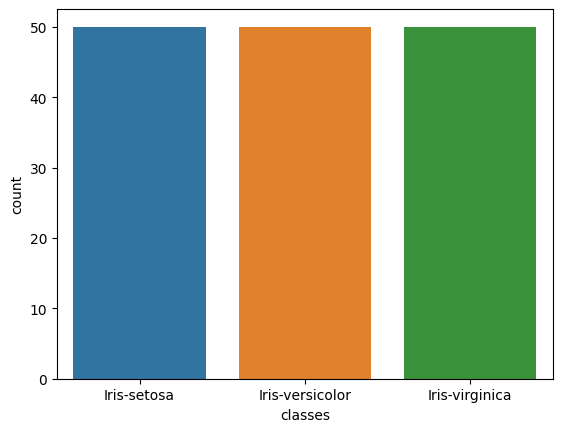

In [13]:
sns.countplot(x = 'classes', data=dataset, order = dataset['classes'].value_counts().index)

In [14]:
dataset.groupby('classes').size()

classes
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [16]:
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values;

In [17]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [20]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (105, 4)
y_train:  (105,)
x_test:  (45, 4)
y_test:  (45,)


## Logistic Regression


In [21]:
model_lr = LogisticRegression(max_iter = 600)

In [22]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [23]:
y_pred_lr = model_lr.predict(x_test)

In [24]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.9777777777777777


## KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model_knn = KNeighborsClassifier()

In [27]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred_knn = model_knn.predict(x_test)

In [29]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.9777777777777777


## Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model_dtc=DecisionTreeClassifier()

In [32]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred_dt=model_dtc.predict(x_test)

In [36]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.9555555555555556


## Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model_nb=GaussianNB()

In [41]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [42]:
y_pred_nb=model_nb.predict(x_test)

In [43]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.9555555555555556


## Support Vector Machine

In [44]:
from sklearn.svm import SVC

In [45]:
model_svc=SVC()

In [46]:
model_svc.fit(x_train,y_train)

SVC()

In [47]:
y_pred_svc=model_svc.predict(x_test)

In [48]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.9555555555555556


## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [51]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [52]:
y_pred_rf = model_nb.predict(x_test)

In [53]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.9777777777777777


## Prediction

In [54]:
Xnew = [[1.2,2.1,1.5,1.8]]

ynew = model_rf.predict(Xnew)

print(ynew)

['Iris-setosa']


In [55]:
Xnew = [[1.9,2.9,1.0,1.5]]

ynew = model_knn.predict(Xnew)

print(ynew)

['Iris-setosa']


In [57]:
Xnew = [[0.9,0.9,2.0,3.0]]

ynew = model_knn.predict(Xnew)

print(ynew)

['Iris-versicolor']


In [58]:
y_test

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [59]:
y_pred_dt

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)